In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
#Load Dataset
df=pd.read_csv('Iris.csv')

In [12]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
df.shape

(150, 6)

Sepal Length vs Sepal Width of IRIS Setosa

In [14]:
df.SepalLengthCm.corr(df.SepalWidthCm)

-0.10936924995064935

In [15]:
#taking only first 50 columns of Iris-setosa species
m,n=df.shape
X=df.SepalLengthCm.iloc[0:120].values.reshape(120,1)
Y=df.SepalWidthCm.iloc[0:120].values.reshape(120,1)

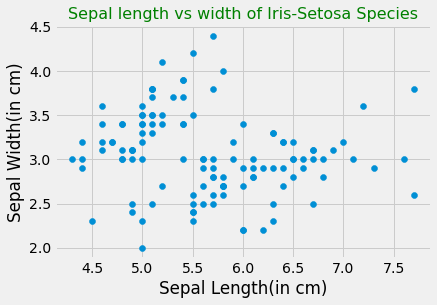

In [16]:
plt.scatter(X,Y)
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

Without Gradient Descent

In [17]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [19]:
# Train the model using the training sets
regr.fit(X,Y)

LinearRegression()

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[-0.09051723]]
Intercept: 
 [3.57664862]


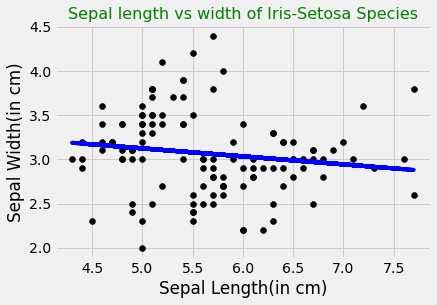

In [21]:
#Plotting Regression Line Against True Labels
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-b')
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

In [22]:
#Evaluate Model

# The mean squared error

print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(Y,X))

Mean squared error (Test Dataset): 7.61


With Gradient Descent

In [23]:
# gradient descenrt function
iterations = 100

def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    learning_rate = 0.02
    m = []
    b = []
    cost_func = []
    
    for i in range(iterations):

        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum((y - y_predicted)**2)
        md = -(2/n) * sum(x*(y- y_predicted))
        bd = -(2/n) * sum(y- y_predicted)

        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd

        print("i = {}, m = {}, b = {}, cost = {}".format(i, m_curr, b_curr, cost))
        
        m.append(m_curr)
        b.append(b_curr)
        cost_func.append(cost)
    return m, b, cost_func

In [24]:
m, b, cost_func = gradient_descent(X, Y)

i = 0, m = [0.69086333], b = [0.1226], cost = [9.609]
i = 1, m = [0.45478139], b = [0.0840918], cost = [1.49646387]
i = 2, m = [0.53468962], b = [0.10050205], cost = [0.55344527]
i = 3, m = [0.50687921], b = [0.09818865], cost = [0.44358585]
i = 4, m = [0.5157898], b = [0.10225571], cost = [0.43054697]
i = 5, m = [0.51218283], b = [0.10414541], cost = [0.42875985]
i = 6, m = [0.51284342], b = [0.10677506], cost = [0.42828065]
i = 7, m = [0.51204963], b = [0.10915016], cost = [0.42795384]
i = 8, m = [0.51175202], b = [0.11160973], cost = [0.42764511]
i = 9, m = [0.51128567], b = [0.11403821], cost = [0.42733886]
i = 10, m = [0.51087724], b = [0.11647499], cost = [0.42703328]
i = 11, m = [0.51044947], b = [0.11890665], cost = [0.42672816]
i = 12, m = [0.51002868], b = [0.12133776], cost = [0.42642347]
i = 13, m = [0.50960592], b = [0.12376676], cost = [0.42611921]
i = 14, m = [0.50918422], b = [0.12619419], cost = [0.42581538]
i = 15, m = [0.50876256], b = [0.12861987], cost = [0.4255119

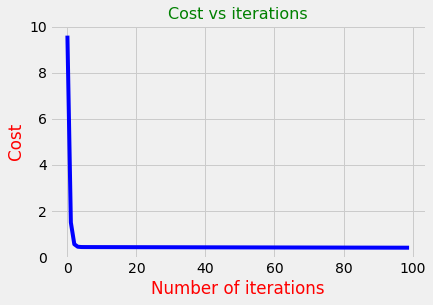

In [25]:
plt.plot(np.arange(iterations),cost_func, color='b')
plt.xlabel('Number of iterations',color='red')
plt.ylabel('Cost',color='red')
plt.title('Cost vs iterations',color='green',fontsize=16)
plt.show()

In [26]:
print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(m[-1]*X + b[-1],X))

Mean squared error (Test Dataset): 7.16


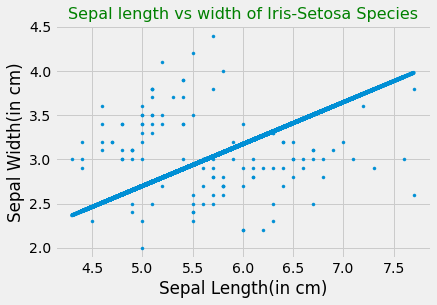

In [27]:
plt.scatter(X,Y,marker='.')
plt.plot(X,(m[-1]*X + b[-1]))
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

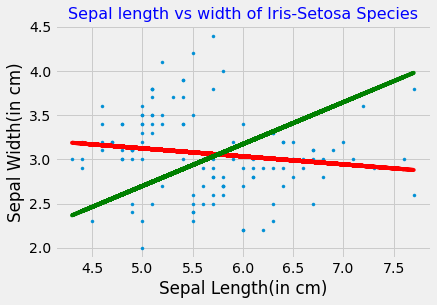

In [28]:
plt.scatter(X,Y,marker='.')
# Without Gradient Descent
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-r')

# With Gradient Descent
plt.plot(X,m[-1]*X + b[-1],'g')

plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='b',fontsize=16)
plt.show()

Petal Length vs Petal Width of IRIS Setosa

In [29]:
df.PetalLengthCm.corr(df.PetalWidthCm)

0.962757097050966

In [30]:
#taking only first 50 columns of Iris-setosa species
m,n=df.shape
X=df.PetalLengthCm.iloc[0:50].values.reshape(50,1)
Y=df.PetalWidthCm.iloc[0:50].values.reshape(50,1)

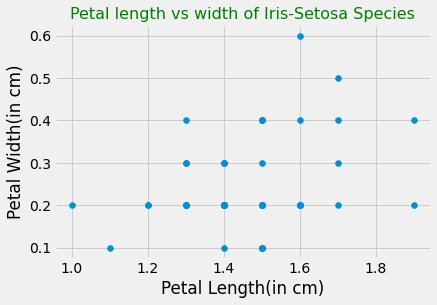

In [31]:
plt.scatter(X,Y)
plt.xlabel('Petal Length(in cm)')
plt.ylabel('Petal Width(in cm)')
plt.title('Petal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

Without Gradient Descent

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [33]:
# Train the model using the training sets
regr.fit(X,Y)


LinearRegression()

In [34]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[0.18926247]]
Intercept: 
 [-0.03308026]


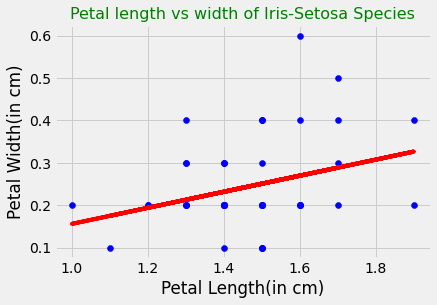

In [35]:
#Plotting Regression Line Against True Labels
plt.scatter(X, Y,  color='blue')
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-r')
plt.xlabel('Petal Length(in cm)')
plt.ylabel('Petal Width(in cm)')
plt.title('Petal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()


In [36]:
print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(Y,X))

Mean squared error (Test Dataset): 1.52


With Gradient Descent

In [37]:
iterations = 100

def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    learning_rate = 0.01
    m = []
    b = []
    cost_func = []
    
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum((y - y_predicted)**2)
        md = -(2/n) * sum(x*(y- y_predicted))
        bd = -(2/n) * sum(y- y_predicted)
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
        print("i = {}, m = {}, b = {}, cost = {}".format(i, m_curr, b_curr, cost))
        m.append(m_curr)
        b.append(b_curr)
        cost_func.append(cost)
    return m, b, cost_func

In [38]:
m, b, cost_func = gradient_descent(X, Y)

i = 0, m = [0.007256], b = [0.00488], cost = [0.0708]
i = 1, m = [0.0140538], b = [0.00944994], cost = [0.0633955]
i = 2, m = [0.02042238], b = [0.01372945], cost = [0.0568983]
i = 3, m = [0.02638891], b = [0.01773689], cost = [0.05119724]
i = 4, m = [0.03197881], b = [0.02148949], cost = [0.04619476]
i = 5, m = [0.03721593], b = [0.02500336], cost = [0.04180525]
i = 6, m = [0.04212258], b = [0.02829361], cost = [0.0379536]
i = 7, m = [0.04671966], b = [0.03137439], cost = [0.03457392]
i = 8, m = [0.05102677], b = [0.03425895], cost = [0.03160836]
i = 9, m = [0.05506225], b = [0.03695971], cost = [0.02900618]
i = 10, m = [0.05884328], b = [0.03948829], cost = [0.02672285]
i = 11, m = [0.06238597], b = [0.04185559], cost = [0.0247193]
i = 12, m = [0.0657054], b = [0.04407182], cost = [0.02296126]
i = 13, m = [0.06881568], b = [0.04614653], cost = [0.02141863]
i = 14, m = [0.07173005], b = [0.04808868], cost = [0.02006502]
i = 15, m = [0.07446092], b = [0.04990665], cost = [0.01887726]
i

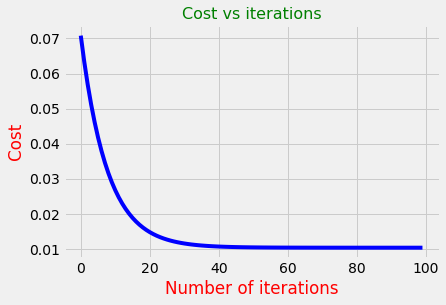

In [39]:

plt.plot(np.arange(iterations),cost_func, color='b')
plt.xlabel('Number of iterations',color='red')
plt.ylabel('Cost',color='red')
plt.title('Cost vs iterations',color='green',fontsize=16)
plt.show()

In [40]:
print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(m[-1]*X + b[-1],X))


Mean squared error (Test Dataset): 1.51


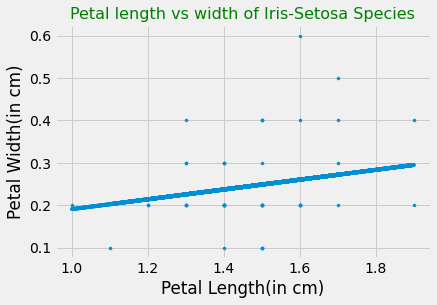

In [41]:
plt.scatter(X,Y,marker='.')
plt.plot(X,(m[-1]*X + b[-1]))
plt.xlabel('Petal Length(in cm)')
plt.ylabel('Petal Width(in cm)')
plt.title('Petal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()


In [42]:
print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(Y,X))

Mean squared error (Test Dataset): 1.52


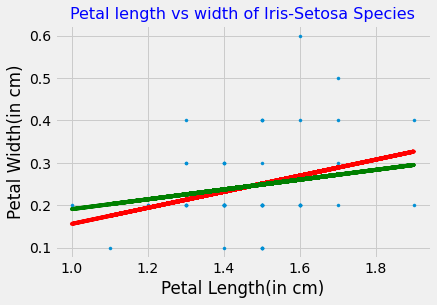

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(X,Y,marker='.')
# Without Gradient Descent
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-r')

# With Gradient Descent
plt.plot(X,m[-1]*X + b[-1],'g')

plt.xlabel('Petal Length(in cm)')
plt.ylabel('Petal Width(in cm)')
plt.title('Petal length vs width of Iris-Setosa Species',color='b',fontsize=16)
plt.show()